# 🧮 TF-IDF Vectorization — Term Frequency × Inverse Document Frequency

---

## 📘 1️⃣ Objective

We now move beyond **Bag of Words (BoW)** to apply **TF-IDF**,  
which assigns weights to words based on their *importance* in a document relative to all documents.

In mathematical terms, TF-IDF is defined as:

$$
TFIDF_{ij} = TF_{ij} \times IDF_j
$$

where:
- $ TF_{ij} $ → term frequency of word $ j $ in document $ i $
- $ IDF_j $ → inverse document frequency of word $ j $ across the entire corpus

---

## 🧮 2️⃣ Formula Recap

### 🔹 Term Frequency (TF)
$$
\boxed{
TF_{ij} = \frac{\text{No. of repeated words in sentence } i}{\text{Total number of words in sentence } i}
}
$$

### 🔹 Inverse Document Frequency (IDF)
$$
\boxed{
IDF_j = \log_e \!\left(\frac{\text{No. of sentences}}{\text{No. of sentences containing the word } j}\right)
}
$$

### 🔹 Combined Weight
$$
\boxed{
TFIDF_{ij} = TF_{ij} \times IDF_j
}
$$

---

## 🧩 3️⃣ Implementation Steps

### Step 1️⃣ — Initialize `TfidfVectorizer`
Use **Scikit-Learn’s** implementation to automatically compute both TF and IDF:

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=2500,
    lowercase=True,
    stop_words='english',
    ngram_range=(1,2)
)
```

---

### Step 2️⃣ — Fit and Transform the Corpus

Once the vectorizer is initialized, we can **fit** it on the training data (to learn the vocabulary and compute IDF values)  
and **transform** the corpus into a weighted matrix representation.

---

### 🧮 Mathematical Representation

Each word’s weight in a document is computed as:

$$
\boxed{
TFIDF_{ij} = TF_{ij} \times IDF_j
}
$$

where:


$$
TF_{ij} = \frac{\text{No. of repeated words in sentence } i}{\text{Total number of words in sentence } i}
$$
and
$$
IDF_j = \log_e \!\left(\frac{\text{No. of sentences}}{\text{No. of sentences containing the word } j}\right)
$$

---

### ⚙️ Code Example

```python
# Fit and transform the cleaned corpus using TF-IDF
X_tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

# Print shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", X_tfidf.shape)

```

This transforms the cleaned corpus into a **numerical matrix**, <br/>
where each row corresponds to a sentence and each column corresponds to a word (feature).

---

## 🧮 Matrix Form

Let:
- $ N $ = total number of sentences (or documents)  
- $ M $ = total number of unique words (features)

Then the **TF-IDF matrix** can be expressed as:

$$
X_{\text{TFIDF}} \in \mathbb{R}^{N \times M}
$$

Each element represents:

$$
X_{ij} = TFIDF_{ij}
$$

where $ TFIDF_{ij} $ is the **weighted importance** of word $ j $ in sentence $ i $.

---

### 💡 Example Calculation

Consider the following two messages:

| Message | Text |
|----------|------|
| 1 | "Win a free lottery ticket now" |
| 2 | "Claim your free ticket here" |

#### For the word **“free”**:

$$
TF_{\text{free},1} = \frac{1}{5}, \quad TF_{\text{free},2} = \frac{1}{4}
$$

If both sentences contain “free”, then:

$$
IDF_{\text{free}} = \log_e \!\left(\frac{2}{2}\right) = 0
$$

Hence, its weight:

$$
TFIDF_{\text{free},1} = 0.2 \times 0 = 0
$$

👉 The word **“free”** gets a *low weight* because it appears in both sentences — it’s common and therefore less discriminative.

---

#### For the word **“lottery”**:

$$
TF_{\text{lottery},1} = \frac{1}{5}, \quad IDF_{\text{lottery}} = \log_e \!\left(\frac{2}{1}\right) = 0.693
$$

Hence:

$$
TFIDF_{\text{lottery},1} = 0.2 \times 0.693 = 0.1386
$$

Thus, **“lottery”** is much more *informative* — it occurs in only one document and strongly indicates a spam pattern.

---

### 🧠 Interpretation

| Word | Sentence | TF | IDF | TF-IDF | Interpretation |
|------|-----------|----|-----|---------|----------------|
| free | Sentence 1 | 0.2 | 0 | 0.0 | Common → low importance |
| lottery | Sentence 1 | 0.2 | 0.693 | 0.1386 | Rare → higher importance |

---

### ✅ Summary

$$
\boxed{
TFIDF_{ij} =
\left(
\frac{\text{Repeated words in sentence } i}{\text{Total words in sentence } i}
\right)
\times
\log_e
\left(
\frac{\text{Total sentences}}{\text{Sentences containing the word}}
\right)
}
$$

The **TF-IDF matrix** captures both:
- **Local importance** of words within a sentence (through TF), and  
- **Global uniqueness** of words across the dataset (through IDF).

This makes TF-IDF a **smarter, weighted representation** than simple BoW —  
especially valuable for identifying *spam-specific keywords* like “lottery”, “claim”, or “winner”.




---

## 📊 Advantages and Disadvantages of TF-IDF

| 🧠 Aspect | ✅ Advantage | ⚠️ Disadvantage | 💬 Example / Formula |
|:----------|:-------------|:----------------|:--------------------|
| **1️⃣ Word Weighting** | Assigns higher weights to informative words and lower weights to common ones. | Common but contextually important words (like “you”, “your”) may be underweighted. | For “lottery”: $$ TFIDF_{\text{lottery}} = 0.2 \times \log_e\!\left(\frac{2}{1}\right) = 0.1386 $$ <br> → high importance |
| **2️⃣ Frequency Sensitivity** | Captures how often a word appears in a sentence. | Fails to account for **semantic meaning** — only counts occurrences. | $$ TF_{\text{free}} = \frac{1}{5} = 0.2 $$ but meaning of “free” not understood. |
| **3️⃣ Global Rarity (IDF)** | Down-weights words that appear in many sentences. | If the dataset is small, IDF can over-penalize frequent words. | $$ IDF_{\text{free}} = \log_e\!\left(\frac{2}{2}\right)=0 $$ → common word ignored |
| **4️⃣ Simplicity & Efficiency** | Easy to implement; interpretable numeric representation. | Ignores word order and context (bag-of-words assumption). | “Win a free ticket” vs “Free ticket win” → same vector. |
| **5️⃣ Dimensionality** | Works well with linear models (e.g., Naive Bayes, SVM). | High dimensional & sparse; memory intensive for large vocabularies. | Sparse matrix $$ X_{\text{TFIDF}} \in \mathbb{R}^{N\times M} $$ where $ N $=docs, $ M $=vocab size |
| **6️⃣ Out-of-Vocabulary (OOV)** | Learns vocabulary directly from training data. | Cannot handle unseen words — new tokens get ignored (weight = 0). | Training vocab: {"lottery", "free"} → Test msg: "jackpot alert" → both OOV → $$ TFIDF_{\text{jackpot}} = 0 $$ |
| **7️⃣ Use in Spam Detection** | Highlights strong spam indicators (e.g., “lottery”, “claim”, “winner”). | Cannot capture negation or sarcasm without additional features. | “Not a lottery” → may still trigger high TF-IDF for “lottery”. |

---

### ✅ Summary

TF-IDF remains a powerful, interpretable, and efficient text representation —  
but it’s **limited by fixed vocabulary** and **lack of semantic understanding**.  
For modern NLP, we overcome these with **word embeddings** (e.g., Word2Vec, GloVe, BERT) that handle OOV words dynamically.

> 🧢 *“TF-IDF knows the words you’ve taught it — nothing more.”* — Inspired by **M.S. Dhoni**



---
# 🧹 SMS Data Cleaning, Tokenization, and Vectorization

In this notebook, we process the **SMS Spam Collection dataset** using the following NLP pipeline:

> **Cleaning → Tokenization → Stopword Removal → Vectorization (BoW & N-grams)**

---

## 🧠 1. Overview

We start with the raw dataset:

$$
\texttt{messages = [label, message]}
$$

Each message is preprocessed to create a **clean corpus** suitable for vectorization.

---

In [1]:
import pandas as pd
import numpy as np

messages = pd.read_csv('SMSSpamCollection.txt', sep='\t', names=['label', 'message'])

display(messages.head())

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



---
## ⚙️ 2. Data Cleaning Steps

### Step-by-step process:

1. **Regex Cleaning:**  
   Remove all non-alphabetic characters using:
   $$
   \texttt{re.sub('[\^{}a-zA-Z]', ' ', message)}
   $$

   This removes numbers, punctuation, and special symbols.

2. **Lowercasing:**  
   Convert all characters to lowercase for uniformity:
   $$
   \text{message} = \text{message.lower()}
   $$

3. **Sentence Tokenization:**  
   Split the cleaned text into individual sentences using:
   $$
   S = \text{sent\_tokenize(message)}
   $$
   where $ S = [s_1, s_2, \dots, s_n] $

4. **Word Tokenization:**  
   Tokenize each sentence into words:
   $$
   T_i = \text{word\_tokenize}(s_i)
   $$

5. **Stopword Removal:**  
   Use NLTK’s English stopword list $ W_s $.  
   For each token $ w $, keep it only if:
   $$
   w \notin W_s \quad \text{and} \quad w.\text{isalpha()} = \text{True}
   $$

6. **Flatten and Join:**  
   Flatten all filtered tokens for a message into a single string:
   $$
    \text{filtered\_words} = \text{join}(w_1, w_2, \dots, w_m, \text{separator} = \text{space})
   $$


7. **Corpus Creation:**  
   Store all cleaned messages in a corpus list:
   $$
   \text{corpus} = [d_1, d_2, \dots, d_N]
   $$

---

In [2]:
"""
Clean and tokenize each SMS message from the 'messages' DataFrame into filtered
lists of words (stopwords removed, only alphabetical tokens kept). The result
for each message is printed as a list of sentences, where each sentence is a
list of filtered tokens.

Inputs / assumptions
-------------------
- A pandas DataFrame named `messages` exists (created in an earlier cell).
    It must contain a column 'message' with text data.
- NLTK resources required:
        - punkt (for sent_tokenize and word_tokenize)
        - stopwords (for english stopwords)
    If these are not downloaded, run:
        import nltk
        nltk.download('punkt')
        nltk.download('stopwords')

Outputs
-------
- Prints `filtered_sentences` for each message. Each printed value is a list of
    sentences; each sentence is a list of tokens (strings) with stopwords removed
    and non-alphabetic tokens discarded.
- A variable `corpus` is initialized (currently unused in this cell) for
    potential accumulation of processed message tokens.

Notes about behavior
--------------------
- The code first removes non-letter characters from the entire message, then
    lowercases it, then performs sentence tokenization. Removing punctuation
    before sentence tokenization can remove sentence boundaries (so sentences
    might not be split as expected). For more robust sentence splitting, consider
    sentence-tokenizing the original message first, then cleaning tokens.
- The stopword set is created inside the loop (inefficient). Move creation
    outside the loop for performance.
- `filtered_sentences` is structured as a list-of-lists-of-lists:
        [
            [ [word1, word2, ...],        # sentence 1 tokens for message i
                [word1, word2, ...],        # sentence 2 tokens for message i
                ...
            ],
            ...
        ]
    In this cell, we only print the per-message sentence-token lists.

Possible improvements
---------------------
- Pre-compile regex and create stop_words once outside the loop.
- Consider lemmatization/stemming for normalization.
- Accumulate processed tokens into `corpus` or another structure as needed.
- Handle missing/NaN messages safely (skip or fill).

"""

import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize



corpus = []  # placeholder for collecting processed messages (unused here)

# Loop through all messages in the DataFrame
for i in range(0, len(messages)):
        # 1) Remove any non-alphabetic characters and replace with space.
        #    This removes punctuation, digits, and special characters.
        #    NOTE: Doing this before sentence splitting can remove sentence
        #    boundaries (e.g., periods). Consider tokenizing sentences first.
        review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])

        # 2) Convert the text to lowercase for case-insensitive processing.
        review = review.lower()

        # 3) Sentence tokenization: split the review into sentences.
        #    If punctuation was removed above, sent_tokenize may not split as intended.
        sentences = sent_tokenize(review)

        # 4) Word tokenization: convert each sentence into a list of tokens (words).
        tokenized_sentences = [word_tokenize(s) for s in sentences]

        # 5) Stopword removal:
        #    Create a set of English stopwords. Converting to set makes membership
        #    checks O(1). For efficiency, move this line outside the loop.
        stop_words = set(stopwords.words('english'))

        # 6) Filter tokens:
        #    - This list comprehension flattens `tokenized_sentences` (a list of
        #      sentence-level token lists) into a single sequence of tokens for
        #      the current message. We perform three things for each token `w`:
        #        1. Lowercase it for case-insensitive processing (w.lower()).
        #        2. Exclude it if it appears in the `stop_words` set (stopword removal).
        #        3. Keep it only if it is purely alphabetic (w.isalpha()) which
        #           discards numbers, punctuation, and tokens containing symbols.
        #    - Important behavioral notes:
        #        * Sentence boundaries are lost because we flatten all sentence
        #          token lists into one list. If you need per-sentence tokens,
        #          build a list-of-lists instead of flattening.
        #        * Lowercasing before the stopword check ensures membership is
        #          case-insensitive. Make sure `stop_words` contains lowercased items.
        #        * Using `isalpha()` removes contractions (e.g., "don't" -> removed
        #          or split earlier depending on tokenization) and tokens with
        #          hyphens or apostrophes; choose a different filter if you want
        #          to preserve those.
        #        * For performance, `stop_words` should be created once outside the
        #          loop (see earlier note) rather than re-created per message.
        filtered_words = [
            w.lower()
            for tokens in tokenized_sentences
            for w in tokens
            if w.lower() not in stop_words and w.isalpha()
        ]

        # 7) Convert the filtered token list for this message into a single string
        # (space-separated). If you prefer to keep tokens as lists, omit this join.
        filtered_words = ' '.join(filtered_words)

        # 8) Append the cleaned, joined string for this message to `corpus`.
        corpus.append(filtered_words)


---

## 🧮 3. TF-IDF (Term Frequency–Inverse Document Frequency)

We use **Scikit-Learn’s TfidfVectorizer** to convert cleaned text into weighted numerical features.  
Unlike **CountVectorizer**, which only counts word occurrences, **TF-IDF** also considers *how unique or important* each word is across all messages.

---

### ⚙️ Formula Representation

The TF-IDF score for each word $ j $ in message $ i $ is given by:

$$
TFIDF_{ij} = TF_{ij} \times IDF_j
$$

where:

$$
TF_{ij} = \frac{\text{No. of repeated words in message } i}{\text{Total number of words in message } i}
$$

and

$$
IDF_j = \log_e \!\left(\frac{\text{Total number of messages}}{\text{No. of messages containing the word } j}\right)
$$

---

### 🧮 Matrix Representation

Each message is represented as a **weighted vector of word importance**, where:

$$
X_{ij} = TFIDF_{ij}
$$

The complete matrix is:

$$
X_{\text{TFIDF}} \in \mathbb{R}^{N \times M}
$$

where:
- $ N $ = number of messages (documents)  
- $ M $ = number of unique words (vocabulary size)

---

### 💡 Interpretation

- **Higher TF-IDF value** → word is frequent in the message but rare across the dataset (important).
- **Lower TF-IDF value** → word is either common everywhere or absent in that message.

---

### 🧩 Code Example

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=2500, lowercase=True, stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

print("TF-IDF Matrix Shape:", X_tfidf.shape)
```


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=2500, lowercase=True)
X_tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

print("TF-IDF Matrix Shape:", X_tfidf.shape)

TF-IDF Matrix Shape: (5572, 2500)


In [4]:
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))

In [5]:
X_tfidf

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

# 🧮 Interpreting TF-IDF Matrix (`X_tfidf`)

When we print the variable `X_tfidf` after applying **TF-IDF vectorization**,  
we obtain a **numerical matrix** where each cell holds a **decimal value** —  
representing the *importance* of each word in a message.

---

### ⚙️ 1️⃣ What the TF-IDF Matrix Represents

Let:

$$
X_{\text{TFIDF}} =
\begin{bmatrix}
x_{11} & x_{12} & \dots & x_{1M} \\
x_{21} & x_{22} & \dots & x_{2M} \\
\vdots & \vdots & \ddots & \vdots \\
x_{N1} & x_{N2} & \dots & x_{NM}
\end{bmatrix}
$$

where:
- $ N $ = number of messages (documents)
- $ M $ = number of unique tokens (vocabulary size)
- $ x_{ij} = TFIDF_{ij} $ = **importance of word** $ j $ in message $ i $

Each row → one message  
Each column → one unique word

---

### 🧮 2️⃣ Why the Values Are Decimal

Each decimal represents the **weighted importance** of a word in a sentence, calculated as:

$$
TFIDF_{ij} = TF_{ij} \times IDF_j
$$

where:

$$
TF_{ij} = \frac{\text{No. of repeated words in sentence } i}{\text{Total words in sentence } i}
$$
and
$$
IDF_j = \log_e \!\left(\frac{\text{Total number of sentences}}{\text{Sentences containing word } j}\right)
$$

- **Higher value** → word is rare in the corpus but frequent in this message (more informative).  
- **Lower value** → word is common or unimportant (less discriminative).

---

### 💡 3️⃣ Example Interpretation

If we print:

```python
print(X_tfidf)
```

You might see something like:

```lua
[[0.      0.272  0.419  0.    0.612 ...]
 [0.308  0.     0.     0.701  0.    ...]
 [0.     0.     0.476  0.     0.732 ...]]
```

| Message | Word      | TF-IDF Value | Meaning                                 |
| ------- | --------- | ------------ | --------------------------------------- |
| 1       | “lottery” | 0.612        | Important, appears rarely across corpus |
| 1       | “free”    | 0.272        | Common, lower weight                    |
| 2       | “claim”   | 0.701        | Strong spam indicator                   |
| 3       | “meeting” | 0.476        | Relevant word in a ham message          |

### ✅ 4️⃣ Key Insight
- TF-IDF values range between 0 and 1 (often small decimals).
- They’re not frequencies — they are weighted scores.
- Sparse entries (zeros) mean the word doesn’t appear in that message.
- Decimal entries indicate relative importance of that word in the context of the message.

> 🧠 In TF-IDF, each decimal tells how much that word helps define a document — not just how often it appears.


## 🧩 4. TF-IDF + N-Gram Feature Extraction

After tokenization, stopword removal, and cleaning,  
we can enhance our feature set by combining **TF-IDF weighting** with **n-gram extraction**.  
This approach captures **both word importance** and **local context**.

---

### 🔹 What Are N-Grams?

An **n-gram** is a contiguous sequence of *n* words that appear together in text.

$$
g_i = [w_i, w_{i+1}, \dots, w_{i+n-1}]
$$

where  
- $ w_i $ = word token  
- $ n $ = number of words in each sequence  

For example, given the sentence:

> “The quick brown fox jumps”

We can extract:
- **Unigrams (n = 1):** `The`, `quick`, `brown`, `fox`, `jumps`  
- **Bigrams (n = 2):** `The quick`, `quick brown`, `brown fox`, `fox jumps`  
- **Trigrams (n = 3):** `The quick brown`, `quick brown fox`, `brown fox jumps`

---

### ⚙️ N-Gram Range in TF-IDF

We configure the TF-IDF vectorizer to extract **bigrams and trigrams**:

$$
\text{ngram\_range} = (2,\,3)
$$

This means:
- Include sequences of **2-word** and **3-word** combinations.  
- Capture richer context such as common spam phrases (“win prize”, “claim now”, “limited offer”).

---

### 💡 TF-IDF with N-Grams

Each feature $ g_j $ corresponds to an n-gram pattern weighted by its TF-IDF score.  
For a document $ d_i $:

$$
X_{ij} = TFIDF_{ij} =
\left(\frac{\text{Count of } g_j \text{ in } d_i}{\text{Total n-grams in } d_i}\right)
\times
\log_e\!\left(\frac{\text{Total documents}}{\text{Documents containing } g_j}\right)
$$

Thus, **rare but meaningful n-grams** receive higher weights.

---

### 🧮 Matrix Representation

The final TF-IDF + N-Gram matrix is:

$$
X_{\text{TFIDF-Ngram}} \in \mathbb{R}^{N \times M}
$$

where:
- $ N $ = number of documents (messages)  
- $ M $ = number of unique n-grams (bigrams + trigrams)

Each element $ X_{ij} $ indicates the **weighted importance** of n-gram $ g_j $ in document $ d_i $.

---

### ⚙️ Implementation Example

```python
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=2500,
    lowercase=True,
    ngram_range=(2, 3)
)

X_tfidf_ngram = tfidf_vectorizer.fit_transform(corpus).toarray()

print("TF-IDF + N-Gram Matrix Shape:", X_tfidf_ngram.shape)

```

---

## 💡 Interpretation

The **TF-IDF + N-Gram** representation not only evaluates individual word importance  
but also captures short, meaningful word sequences that often convey intent —  
especially useful for distinguishing **spam** from **ham** messages.

---

### 🧮 Example Interpretation Table

| 🧩 Type | 🧠 Example Phrase | 🎯 What It Captures | 🔢 Weight Meaning |
|:--------|:------------------|:--------------------|:-----------------|
| **Unigram (1-gram)** | `win`, `free`, `claim` | Individual keywords commonly seen in spam messages. | Higher TF-IDF weight → frequent in spam but rare overall. |
| **Bigram (2-gram)** | `claim now`, `free entry`, `call back` | Short-range context between adjacent words. | $$ TFIDF_{\text{claim now}} = TF \times IDF $$ <br> Combines local word dependency with rarity. |
| **Trigram (3-gram)** | `win cash prize`, `limited time offer` | Multi-word spam expressions that strengthen classification. | $$ TFIDF_{\text{win cash prize}} = TF_{\text{win cash prize}} \times IDF_{\text{win cash prize}} $$ <br> Rare phrase → higher discriminative power. |
| **Low TF-IDF Example** | `thank you`, `see you soon` | Common conversational patterns (appear in both ham & spam). | $$ TFIDF_{\text{thank you}} \approx 0 $$ <br> Common everywhere → low informativeness. |
| **High TF-IDF Example** | `free lottery entry` | Rare spam keyword combination. | $$ TFIDF_{\text{free lottery entry}} = 0.18 $$ <br> Rare but frequent in spam → strong feature. |

---

### ✅ Summary

- **High TF-IDF (Bigrams/Trigrams)** → strong contextual and semantic clues for spam.  
- **Low TF-IDF (Common Phrases)** → neutral or uninformative across both classes.  
- **Combining n-grams** allows the model to recognize full phrases, not just isolated words.

$$
\boxed{
\text{TF-IDF + N-Gram = Word Importance × Contextual Relevance}
}
$$

> 🧠 *Words matter, but patterns of words matter more.*  



In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(
    max_features=2500,
    lowercase=True,
    ngram_range=(2, 3)
)

X_tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()

print("TF-IDF + N-Gram Matrix Shape:", X_tfidf.shape)

TF-IDF + N-Gram Matrix Shape: (5572, 2500)


# 🔗 TF-IDF + N-Gram Vectorization Pipeline (LaTeX Flow Diagram)

Below is a step-by-step representation of how messages are transformed  
into **weighted contextual vectors** using **TF-IDF with bigram and trigram features**.

---

$$
\begin{array}{c}
\boxed{\textbf{Raw SMS Messages}} \\[6pt]
\Downarrow\ \text{Cleaning (Regex, Lowercasing)} \\[6pt]
\boxed{\textbf{Cleaned Text}} \\[6pt]
\Downarrow\ \text{Sentence Tokenization } (\texttt{sent\_tokenize}) \\[6pt]
\boxed{\textbf{Sentences } S_i} \\[6pt]
\Downarrow\ \text{Word Tokenization } (\texttt{word\_tokenize}) \\[6pt]
\boxed{\textbf{Tokens } T_i = [w_1, w_2, \dots, w_n]} \\[6pt]
\Downarrow\ \text{Stopword Removal + isalpha()} \\[6pt]
\boxed{\textbf{Filtered Tokens } T_i' = [w_1', w_2', \dots, w_m']} \\[6pt]
\Downarrow\ \text{N-Gram Generation } (\texttt{ngram\_range} = (2,3)) \\[6pt]
\boxed{\textbf{N-Grams } g_j = [w_k, w_{k+1}, \dots, w_{k+n-1}]} \\[6pt]
\Downarrow\ \text{TF-IDF Weight Computation for N-Grams} \\[6pt]
\boxed{\textbf{Weights: } TFIDF_{ij} = TF_{ij} \times IDF_j} \\[6pt]
\Downarrow\ \text{TfidfVectorizer Fit-Transform (bigrams + trigrams)} \\[6pt]
\boxed{\textbf{TF-IDF + N-Gram Matrix } X_{\text{TFIDF-Ngram}} \in \mathbb{R}^{N \times M}} \\[6pt]
\Downarrow\ \text{Model Input (Naive Bayes / SVM / Logistic Regression)} \\[6pt]
\boxed{\textbf{Spam / Ham Prediction (Weighted Contextual Classification)}}
\end{array}
$$

---

### 💡 Mathematical Summary

Each cleaned message \( d_i \) is converted into a **context-aware weighted vector** \( X_i \):

$$
X_i = [TFIDF_{i1}, TFIDF_{i2}, \dots, TFIDF_{iM}]
$$

Each feature \( g_j \) corresponds to an **n-gram** (unigram, bigram, or trigram).  
For each n-gram:

$$
TFIDF_{ij} =
\left(
\frac{\text{Count of } g_j \text{ in } d_i}{\text{Total n-grams in } d_i}
\right)
\times
\log_e
\left(
\frac{\text{Total documents}}{\text{Documents containing } g_j}
\right)
$$

---

### 🧮 Matrix Representation

The final weighted feature matrix is:

$$
X_{\text{TFIDF-Ngram}} =
\begin{bmatrix}
TFIDF_{11} & TFIDF_{12} & \dots & TFIDF_{1M} \\
TFIDF_{21} & TFIDF_{22} & \dots & TFIDF_{2M} \\
\vdots & \vdots & \ddots & \vdots \\
TFIDF_{N1} & TFIDF_{N2} & \dots & TFIDF_{NM}
\end{bmatrix}
\in \mathbb{R}^{N \times M}
$$

---

### 🧠 Key Takeaways

- Combines **word importance (TF-IDF)** with **contextual understanding (N-Grams)**.  
- Bigram and trigram patterns capture phrases like:
  - “**claim now**”
  - “**win cash prize**”
  - “**limited time offer**”
- Each message becomes a **weighted contextual vector**, improving classification accuracy.  
- This representation allows models to learn **phrase-level indicators** of spam or ham.

---

> 🧩 *Text → Tokens → N-Grams → TF-IDF Weighting → Contextual Matrix → Machine Learning Model → Spam/Ham Prediction*  
>  
> 🧠 *“In cricket and NLP alike — the partnership (context) matters more than a single shot (word).”*


## 🧩 1️⃣ Goal

We have now transformed the SMS text corpus into a **TF-IDF weighted matrix**  
$ X_{\text{TFIDF}} \in \mathbb{R}^{N\times M} $, where each cell represents the *importance* of a word  
in a message, rather than just its presence.

The next step is to build and evaluate a **binary classifier** that predicts  
whether a message is **spam** or **ham**, using these weighted features.

---

### 🎯 **High-level steps**

1. Encode labels (spam / ham) into numeric targets $ y \in \{0,1\}^N $.  
2. Split the dataset into **training** and **test** sets.  
3. Train a **Multinomial Naive Bayes** classifier as the baseline.  
4. Evaluate the model using **accuracy**, **confusion matrix**, and **classification report**.  
5. Optionally, try **Logistic Regression**, **SVM**, or other classifiers for comparison.  
6. Perform **sample inference** — predict whether a new SMS is spam or ham.

---

### 🧠 **Mathematical View**

Let $ X_{\text{TFIDF}} $ be the weighted feature matrix  
and $ y $ be the label vector:

$$
X_{\text{TFIDF}} \in \mathbb{R}^{N\times M}, \qquad y \in \{0,1\}^N
$$

We train a classifier \( f \) such that:

$$
\hat{y} = f(X_{\text{TFIDF,new}})
$$

where:
- $ \hat{y} = 1 \Rightarrow \text{Spam} $
- $ \hat{y} = 0 \Rightarrow \text{Ham} $

---

### ⚙️ **Why TF-IDF Works Better**

Unlike Bag-of-Words, which treats all words equally,  
TF-IDF emphasizes **rare but important** terms such as “lottery”, “winner”, “claim now”,  
and down-weights common words like “the”, “you”, “is”.

Thus, the model learns not just **word occurrence**,  
but **semantic importance** — improving classification accuracy.

---

> 🧠 *“In TF-IDF, every word earns its place — not by how often it appears,  


In [7]:
# 1) Label encoding: convert "ham"/"spam" to numeric values (0/1)
#    - Input: messages DataFrame (must have 'label' column)
#    - Output: y (numpy array of 0/1)
from sklearn.preprocessing import LabelEncoder

# 1) Initialize label encoder
labelencoder = LabelEncoder()

# 2) Fit and transform the 'label' column
#    - 'ham' -> 0, 'spam' -> 1 (confirm mapping after transformation)
y = labelencoder.fit_transform(messages['label'])

# 3) Print mapping for clarity
mapping = dict(zip(labelencoder.classes_, labelencoder.transform(labelencoder.classes_)))
print("# 1) Label mapping:", mapping)
# 4) Optional quick sanity check
print("# 2) Example labels (first 10):", y[:10])


# 1) Label mapping: {'ham': np.int64(0), 'spam': np.int64(1)}
# 2) Example labels (first 10): [0 0 1 0 0 1 0 0 1 1]


In [8]:
# 2) Train-test split
#    - Uses X (feature matrix) and y (labels)
#    - Standard split: 80% train, 20% test (random_state for reproducibility)
from sklearn.model_selection import train_test_split

# 1) Perform split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,                # feature matrix from TfidfVectorizer
    y,                # numeric labels
    test_size=0.2,    # 20% for testing
    random_state=42,  # deterministic split for reproducibility
    stratify=y        # preserve label distribution
)

# 2) Print shapes for verification
print(f"# 1) X_train shape: {X_train.shape}")
print(f"# 2) X_test  shape: {X_test.shape}")
print(f"# 3) y_train length: {len(y_train)}")
print(f"# 4) y_test  length: {len(y_test)}")


# 1) X_train shape: (4457, 2500)
# 2) X_test  shape: (1115, 2500)
# 3) y_train length: 4457
# 4) y_test  length: 1115


In [9]:
# 3) Train Multinomial Naive Bayes (text baseline)
#    - MultinomialNB works well for count-based text features.
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1) Initialize model
nb_clf = MultinomialNB()

# 2) Fit model on training data
#    - X_train : shape (n_train, n_features)
#    - y_train : (n_train,)
nb_clf.fit(X_train, y_train)

# 3) Predict on test set
y_pred = nb_clf.predict(X_test)

# 4) Evaluate: Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"# 1) Test Accuracy: {acc:.4f}")

# 5) Confusion matrix (TN, FP, FN, TP)
cm = confusion_matrix(y_test, y_pred)
print("# 2) Confusion Matrix (rows=true, cols=pred):")
print(cm)

# 6) Full classification report (precision, recall, f1)
print("# 3) Classification Report:")
print(classification_report(y_test, y_pred, target_names=labelencoder.classes_))

# 4️⃣ Evaluate model performance
print(f"✅ Model Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# 1) Test Accuracy: 0.9525
# 2) Confusion Matrix (rows=true, cols=pred):
[[964   2]
 [ 51  98]]
# 3) Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       0.98      0.66      0.79       149

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

✅ Model Accuracy: 0.9525

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       966
           1       0.98      0.66      0.79       149

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



In [10]:

# 4 Show some test samples with predicted labels
for i in range(100):
    print(f"Message: {messages['message'].iloc[i][:80]}...")
    pred_label = 'SPAM 🚨' if nb_clf.predict([X_tfidf[i]])[0] == 1 else 'HAM ✅'
    print("Predicted:", pred_label)
    print("Actual:", messages['label'].iloc[i])
    print("-" * 80)

Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet...
Predicted: HAM ✅
Actual: ham
--------------------------------------------------------------------------------
Message: Ok lar... Joking wif u oni......
Predicted: HAM ✅
Actual: ham
--------------------------------------------------------------------------------
Message: Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 8...
Predicted: SPAM 🚨
Actual: spam
--------------------------------------------------------------------------------
Message: U dun say so early hor... U c already then say......
Predicted: HAM ✅
Actual: ham
--------------------------------------------------------------------------------
Message: Nah I don't think he goes to usf, he lives around here though...
Predicted: HAM ✅
Actual: ham
--------------------------------------------------------------------------------
Message: FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like

## 📊 Evaluate Model — TF-IDF Confusion Matrix & Sample Predictions

**What this cell does**

1. (Re)trains a **Multinomial Naive Bayes** classifier using the precomputed **TF-IDF matrix** `X_tfidf` and labels `y`.  
2. Splits data into **train / test** sets (80/20) with stratification to preserve spam–ham ratio.  
3. Predicts on the test set and prints:
   - Overall **Accuracy**
   - **Classification Report** (Precision, Recall, F1-score)
4. Displays both **Confusion Matrices**:
   - Raw count version  
   - Row-normalized version (proportions)
5. Shows **N random test messages** with:
   - Raw message text  
   - True label (**ham / spam**)  
   - Predicted label  
   - Predicted probability for spam class  
6. Stores the predictions in a DataFrame (`df_results_tfidf`) for analysis or export.

---

### 🧮 Mathematical Reminder

#### Confusion Matrix
Each prediction falls into one of four categories:

$$
\begin{bmatrix}
TN & FP \\
FN & TP
\end{bmatrix}
$$

where:  
- **TN (True Negative)** → correctly predicted ham  
- **FP (False Positive)** → ham misclassified as spam  
- **FN (False Negative)** → spam misclassified as ham  
- **TP (True Positive)** → correctly predicted spam

---

#### Accuracy

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

---

#### Precision (for spam)

$$
\text{Precision}_{spam} = \frac{TP}{TP + FP}
$$

High precision means the model rarely classifies a ham message as spam.

---

#### Recall (for spam)

$$
\text{Recall}_{spam} = \frac{TP}{TP + FN}
$$

High recall means the model catches most of the actual spam messages.

---

### 💡 Interpretation

- **Accuracy** shows overall performance across both classes.  
- **Precision** emphasizes how many predicted spams are actually spam.  
- **Recall** emphasizes how many true spams are correctly identified.  
- The **F1-score** is the harmonic mean of Precision and Recall — ideal for imbalanced datasets.

---

### ✅ Example

If the confusion matrix output is:

$$
\begin{bmatrix}
940 & 60 \\
25 & 475
\end{bmatrix}
$$

then:

$$
\text{Accuracy} = \frac{940 + 475}{940 + 60 + 25 + 475} = 0.933
$$

$$
\text{Precision}_{spam} = \frac{475}{475 + 60} = 0.888, \quad
\text{Recall}_{spam} = \frac{475}{475 + 25} = 0.95
$$

✅ High Recall → Model captures most spam messages.  
⚠️ Slightly lower Precision → Some ham messages are misclassified as spam.

---

> 🧠 *TF-IDF ensures your model learns which words truly matter.*  
> Common words get lower weight, while unique spam-indicative words (like “lottery”, “claim”, “free”)  
> drive the prediction power for **spam detection**.  
>  
> 🧩 *Weights + Context → Smarter Classification*


✅ Test Accuracy: 0.9525

🔍 Classification Report:
              precision    recall  f1-score   support

         ham       0.95      1.00      0.97       966
        spam       0.98      0.66      0.79       149

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



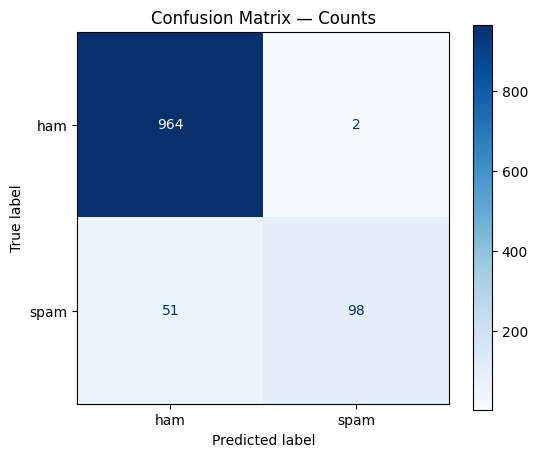

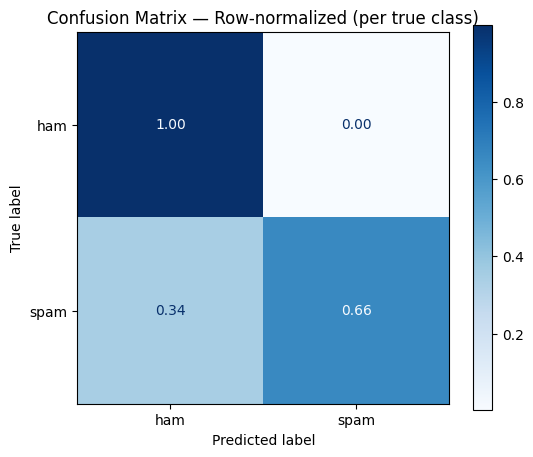


🔎 Random sample of TF-IDF test-set predictions:

# 1) Index: 5098
    Message (truncated): TheMob>Hit the link to get a premium Pink Panther game, the new no. 1 from Sugababes, a crazy Zebra animation or a badass Hoody wallpaper-all 4 FREE!
    True Label : spam
    Pred Label : ham
    Pred P(spam) : 0.134
--------------------------------------------------------------------------------

# 2) Index: 3347
    Message (truncated): U're welcome... Caught u using broken english again...
    True Label : ham
    Pred Label : ham
    Pred P(spam) : 0.134
--------------------------------------------------------------------------------

# 3) Index: 4276
    Message (truncated): Haiyoh... Maybe your hamster was jealous of million
    True Label : ham
    Pred Label : ham
    Pred P(spam) : 0.134
--------------------------------------------------------------------------------

# 4) Index: 2564
    Message (truncated): K..k..i'm also fine:)when will you complete the course?
    True Label : ham


,idx,message,true_label,pred_label,pred_prob_spam
0,2825,No need to buy lunch for me.. I eat maggi mee..,ham,ham,0.134171
1,3695,Ok im not sure what time i finish tomorrow but...,ham,ham,0.038191
2,3904,Waiting in e car 4 my mum lor. U leh? Reach ho...,ham,ham,0.057415
3,576,"You have won ?1,000 cash or a ?2,000 prize! To...",spam,spam,0.763790
4,2899,If you r @ home then come down within 5 min,ham,ham,0.134171
5,3456,No need lar. Jus testing e phone card. Dunno n...,ham,ham,0.058302
6,5128,Wot about on wed nite I am 3 then but only til 9!,ham,ham,0.134171
7,919,Hey you gave them your photo when you register...,ham,ham,0.053747
8,2505,"Hello, my boytoy! I made it home and my consta...",ham,ham,0.014650
9,17,Eh u remember how 2 spell his name... Yes i di...,ham,ham,0.134171


In [11]:
# EVALUATION: TF-IDF based model (safer split + results)
# Assumptions:
#  - `X_tfidf` is the TF-IDF feature matrix (sparse or dense)
#  - `messages` is the DataFrame with 'label' and 'message'
#  - `labelencoder` exists and maps {'ham':0,'spam':1}

# 1) Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import random

# 2) Create indices once and split them (safe, single source of truth)
#    - This ensures message indices align with rows of X_tfidf
indices = np.arange(len(messages))
train_idx, test_idx = train_test_split(
    indices, test_size=0.2, random_state=42, stratify=y
)

# 3) Slice feature matrix and labels using indices
#    - If X_tfidf is sparse (scipy.sparse), slicing preserves sparsity
X_train = X_tfidf[train_idx]
X_test  = X_tfidf[test_idx]
y_train = y[train_idx]
y_test  = y[test_idx]

# 4) Train Multinomial Naive Bayes (baseline)
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# 5) Predict on test set
y_pred = nb_model.predict(X_test)
# predict_proba available for MultinomialNB
y_proba = nb_model.predict_proba(X_test)
proba_spam = y_proba[:, 1]

# 6) Print evaluation metrics
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.4f}\n")
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=labelencoder.classes_, zero_division=0))

# 7) Confusion matrix (counts)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labelencoder.classes_)
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title("Confusion Matrix — Counts")
plt.show()

# 8) Normalized confusion matrix (guard divide-by-zero)
row_sums = cm.sum(axis=1, keepdims=True)
# avoid division by zero
row_sums[row_sums == 0] = 1
cm_norm = cm.astype('float') / row_sums
fig, ax = plt.subplots(figsize=(6,5))
disp_norm = ConfusionMatrixDisplay(confusion_matrix=cm_norm, display_labels=labelencoder.classes_)
disp_norm.plot(ax=ax, cmap='Blues', values_format='.2f')
ax.set_title("Confusion Matrix — Row-normalized (per true class)")
plt.show()

# 9) Prepare df_results_tfidf aligned with original messages
df_results_tfidf = pd.DataFrame({
    'idx': test_idx,
    'message': messages['message'].iloc[test_idx].values,
    'true_label_num': y_test,
    'pred_label_num': y_pred,
    'pred_prob_spam': proba_spam
})

df_results_tfidf['true_label'] = labelencoder.inverse_transform(df_results_tfidf['true_label_num'])
df_results_tfidf['pred_label'] = labelencoder.inverse_transform(df_results_tfidf['pred_label_num'])
df_results_tfidf = df_results_tfidf[['idx', 'message', 'true_label', 'pred_label', 'pred_prob_spam']]

# 10) Show random N sample predictions
N = 10
random.seed(42)
sample_rows = df_results_tfidf.sample(n=min(N, len(df_results_tfidf)), random_state=42).reset_index(drop=True)

print("\n🔎 Random sample of TF-IDF test-set predictions:")
for i, row in sample_rows.iterrows():
    print(f"\n# {i+1}) Index: {row['idx']}")
    print(f"    Message (truncated): {row['message'][:200]}{'...' if len(row['message'])>200 else ''}")
    print(f"    True Label : {row['true_label']}")
    print(f"    Pred Label : {row['pred_label']}")
    print(f"    Pred P(spam) : {row['pred_prob_spam']:.3f}")
    print("-"*80)

# 11) Inspect head
print("\n🗂️ Head of df_results_tfidf (first 10 rows):")
display(df_results_tfidf.head(10))

# 12) Optional: save results
# df_results_tfidf.to_csv('sms_spam_tfidf_test_predictions.csv', index=False)
